## High-level view of the ML life cycle

     - Problem understanding 
     - Data collection.
     - Data annotation.
     - Data wrangling.
     -  Model development, training and evaluation.
     - Model deployment and maintenance in the production environment.
     
     
    

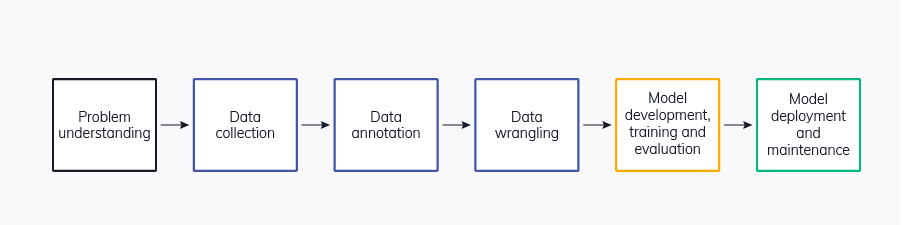

## Synopsis of the project proposal (2-3 pages) 
        
   -  Title of the Project. 
   -  Introduction and Objectives of the Project.
   -  Project Category (RDBMS/OOPS/Networking/Multimedia/Artificial Intelligence/Expert Systems         etc.). 
   -  Tools/Platform, Hardware and Software Requirement specifications. 
   -  Problem Definition, Requirement Specifications (Detailed functional Requirements and             Technical Specifications), Project Planning and Scheduling (Gantt chart and PERT chart). 
   -  Scope of the solution.
   -  Analysis (Data Models like 0, 1 and 2 level DFDs, Complete ER Diagrams with cardinality,         Activity Diagram, Class Diagrams, State Diagrams etc. as per the project requirements). 
   -  A complete Database and tables detail with Primary and Foreign keys, and proper constraints       in the fields (as per project requirements)
   -  A complete structure which includes:  Number of modules and their description to provide an       estimation of the student’s effort on the project.               
   -  Overall network architecture (if required for your project) 
   -  Implementation of security mechanisms at various levels
   -  Future scope and further enhancement of the project.
   -  Bibliography

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

**1** First, we load the MNIST dataset, containing 70,000 28x28 images showing handwritten digits.
You can load this dataset using Keras with a single line of code.

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

**2** The function returns the dataset split into train and test sets.

 - X_train and X_test contain our train and test images.

 - Y_train and Y_test contain the target values: a number between 0 and 9 indicating the digit      shown in the corresponding image.

We have 60,000 images to train the model and 10,000 to test it.

In [3]:
len(Y_train)

60000

In [4]:
#summarize the dataset
print('Train: X=%s Y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s Y=%s' % (X_test.shape, Y_test.shape))


Train: X=(60000, 28, 28) Y=(60000,)
Test: X=(10000, 28, 28) Y=(10000,)


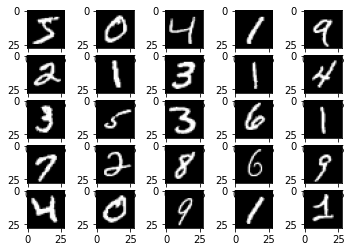

In [5]:
for i in range(25):
    # define subplot
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))

# show the figure
plt.show()

**3** Each pixel goes from 0 to 255. Neural networks work much better with smaller values.

Here we normalize pixels by dividing them by 255. That way, each pixel will go from 0 to 1.

In [6]:
X_train =X_train/255
X_test =X_test/255

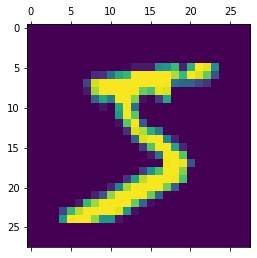

In [7]:
plt.matshow(X_train[0])

In [8]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

**4** The training dataset is structured as a 3-dimensional array of instance, image width, 
and image height. 
 - For a multi-layer perceptron model, you must reduce the images down
 into a vector of pixels. 
 - In this case, the 28×28-sized images will be 784 pixel input values

In [9]:
x_train_flattern= X_train.reshape(len(X_train),28*28)
x_test_flattern= X_test.reshape(len(X_test),28*28)

In [10]:
x_train_flattern.shape

(60000, 784)

In [11]:
x_train_flattern

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**5** Let's now define our model.

 - There are several ways to create a model in Keras. This one is called the "Sequential API."
 - Our model will be a sequence of layers that we will define one by one
 
A lot is going on with this first line.

 - First, we define our model's input shape: a 28x28x1 tensor (width, height, channels.)
 - This is exactly the shape we have in our train dataset.
 
 We also need to define the activation function used for this layer: ReLU.

 - You'll see ReLU everywhere. It's a popular activation function.
 - It will allow us to solve non-linear problems, like recognizing handwritten digits.
 
 Finally, output layers.

 - Notice how the output layer has a size of 10, one for each of our possible digit values, and a    softmax activation.
 - The softmax ensures we get a probability distribution indicating the most likely digit in the    image


In [12]:
model = keras.Sequential([
    
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(80,  activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

**6** After creating our model, we compile it.

 - I'm using Stochastic Gradient Descent (SGD) as the optimizer.
 - The loss is categorical cross-entropy: this is a multi-class classification problem.
 - We want to record the accuracy as the model trains.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



**7** Finally, we fit the model. This starts training it.

 • I'm running 10 total epochs.

 When fit() is done, we have a fully trained model!


In [14]:
hist=model.fit(x_train_flattern, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 3ms/step - loss: 0.2498 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0603 - accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0391 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

In [ ]:
model.evaluate(x_test_flattern,Y_test)

**8** Let's now test the model.

 - This gets a random image from the test set and displays it.

 - Notice that we want the image to come from the test set, containing data the model didn't see   during training.

In [ ]:
y_predicted = model.predict(x_test_flattern)
y_predicted[0]

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
np.argmax(y_predicted[1])

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden Layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(80,  activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist=model.fit(x_train_flattern, Y_train, epochs=10)

In [ ]:
score=model.evaluate(x_test_flattern,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.save('mnist1.h5')
print("Saving the model as mnist1.h5")